In [1]:
# first we import all the inportent library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [88]:
#Loading the data preprocessing the data
df= pd.read_csv("./data/canada_per_capita_income.csv")

In [89]:
# Now do the EDA part 
print(df.shape)

(47, 2)


In [90]:
print(df.isnull().sum())

year                       0
per capita income (US$)    0
dtype: int64


In [91]:
print("number of duplicated records =",df.duplicated().sum())

number of duplicated records = 0


In [92]:
# our data set is clean 
print(df.columns)
df=df.rename(columns = {'per capita income (US$)':'income'})
print("column name after rename =",df.columns)

Index(['year', 'per capita income (US$)'], dtype='object')
column name after rename = Index(['year', 'income'], dtype='object')


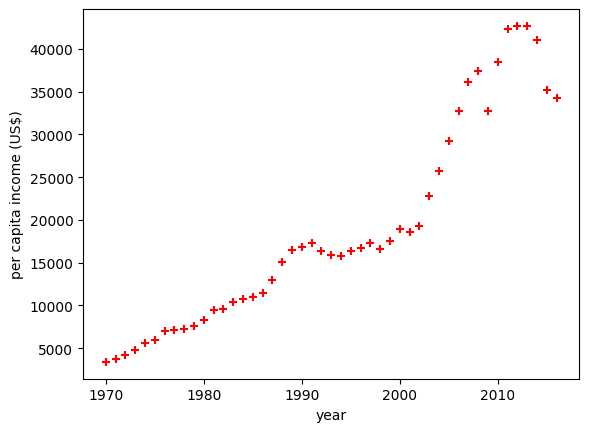

In [93]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(df["year"],df["income"],color='red',marker='+')

In [95]:
new_data=df.drop('income',axis='columns')

In [96]:
income=df.income

In [97]:
# we have one dipendent column 'per capita income (US$)' and one independent column 'year' so we use linear reg.
# creating the object of linear regression
from sklearn import linear_model
# Create linear regression object
reg = linear_model.LinearRegression()

In [137]:
reg.fit(new_data,income)

LinearRegression()

In [99]:
#predict income for 2017
print(reg.predict([[2017]]))

[38803.29886875]


C:\Users\Aman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [100]:
m=reg.coef_

In [101]:
b=reg.intercept_

In [102]:
# we know that
# Y = m * X + b (m is coefficient and b is intercept)
Y=m*2017+b
print(Y)

[38803.29886875]


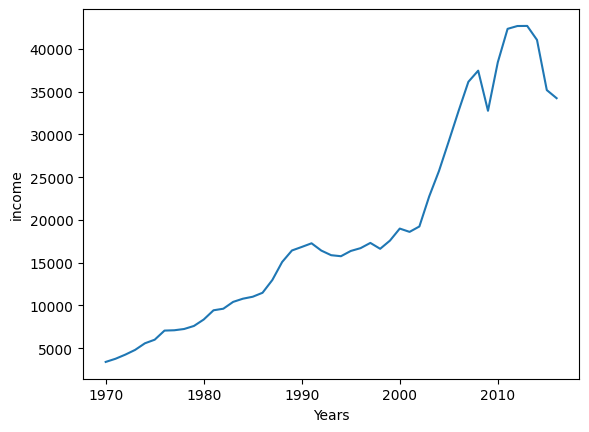

In [127]:
plt.plot(df['year'],df['income'])
plt.xlabel('Years')
plt.ylabel('income')
plt.show()

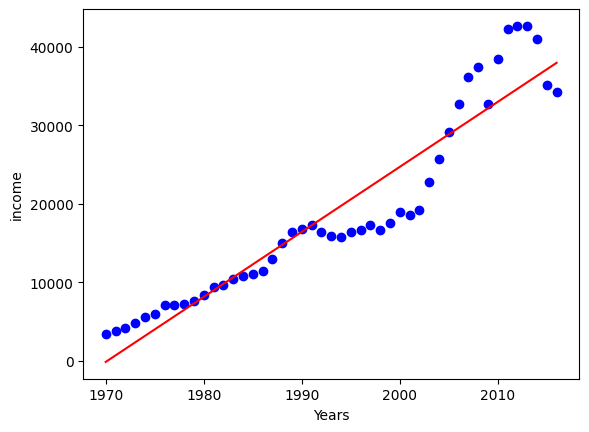

In [136]:
p=reg.predict(new_data)
plt.scatter(df.year,df.income,c="b",label="original value")
plt.plot(new_data.year,p,c="r",label="predicted value")
plt.xlabel('Years')
plt.ylabel('income')
plt.show()

In [128]:
#Now predict some income for feuture

new_df = pd.DataFrame({'Year': [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027]})

In [131]:
current_year_features = new_df['Year'].values.reshape(-1, 1)

# Make the predictions
predicted_income = reg.predict(current_year_features)

C:\Users\Aman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [132]:
predictions_df = pd.DataFrame({'Year': new_df['Year'], 'Predicted Income': predicted_income})
print(predictions_df)

,Year,Predicted Income
0,2017,38803.298869
1,2018,39631.763944
2,2019,40460.229019
3,2020,41288.694094
4,2021,42117.159170
5,2022,42945.624245
6,2023,43774.089320
7,2024,44602.554395
8,2025,45431.019471
9,2026,46259.484546


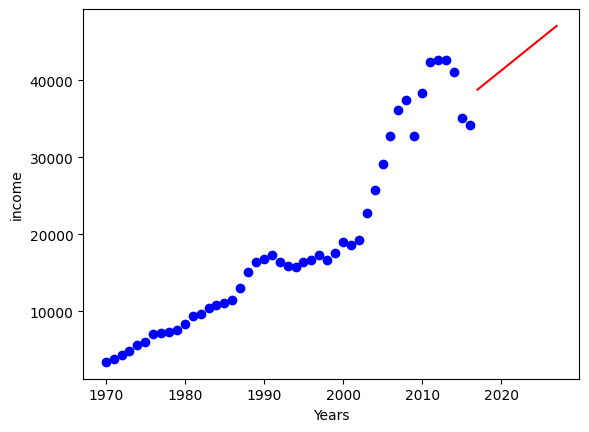

In [133]:
plt.scatter(df.year,df.income,c="b",label="original value")
plt.plot(predictions_df.Year,predictions_df['Predicted Income'],c="r",label="predicted value")
plt.xlabel('Years')
plt.ylabel('income')
plt.show()